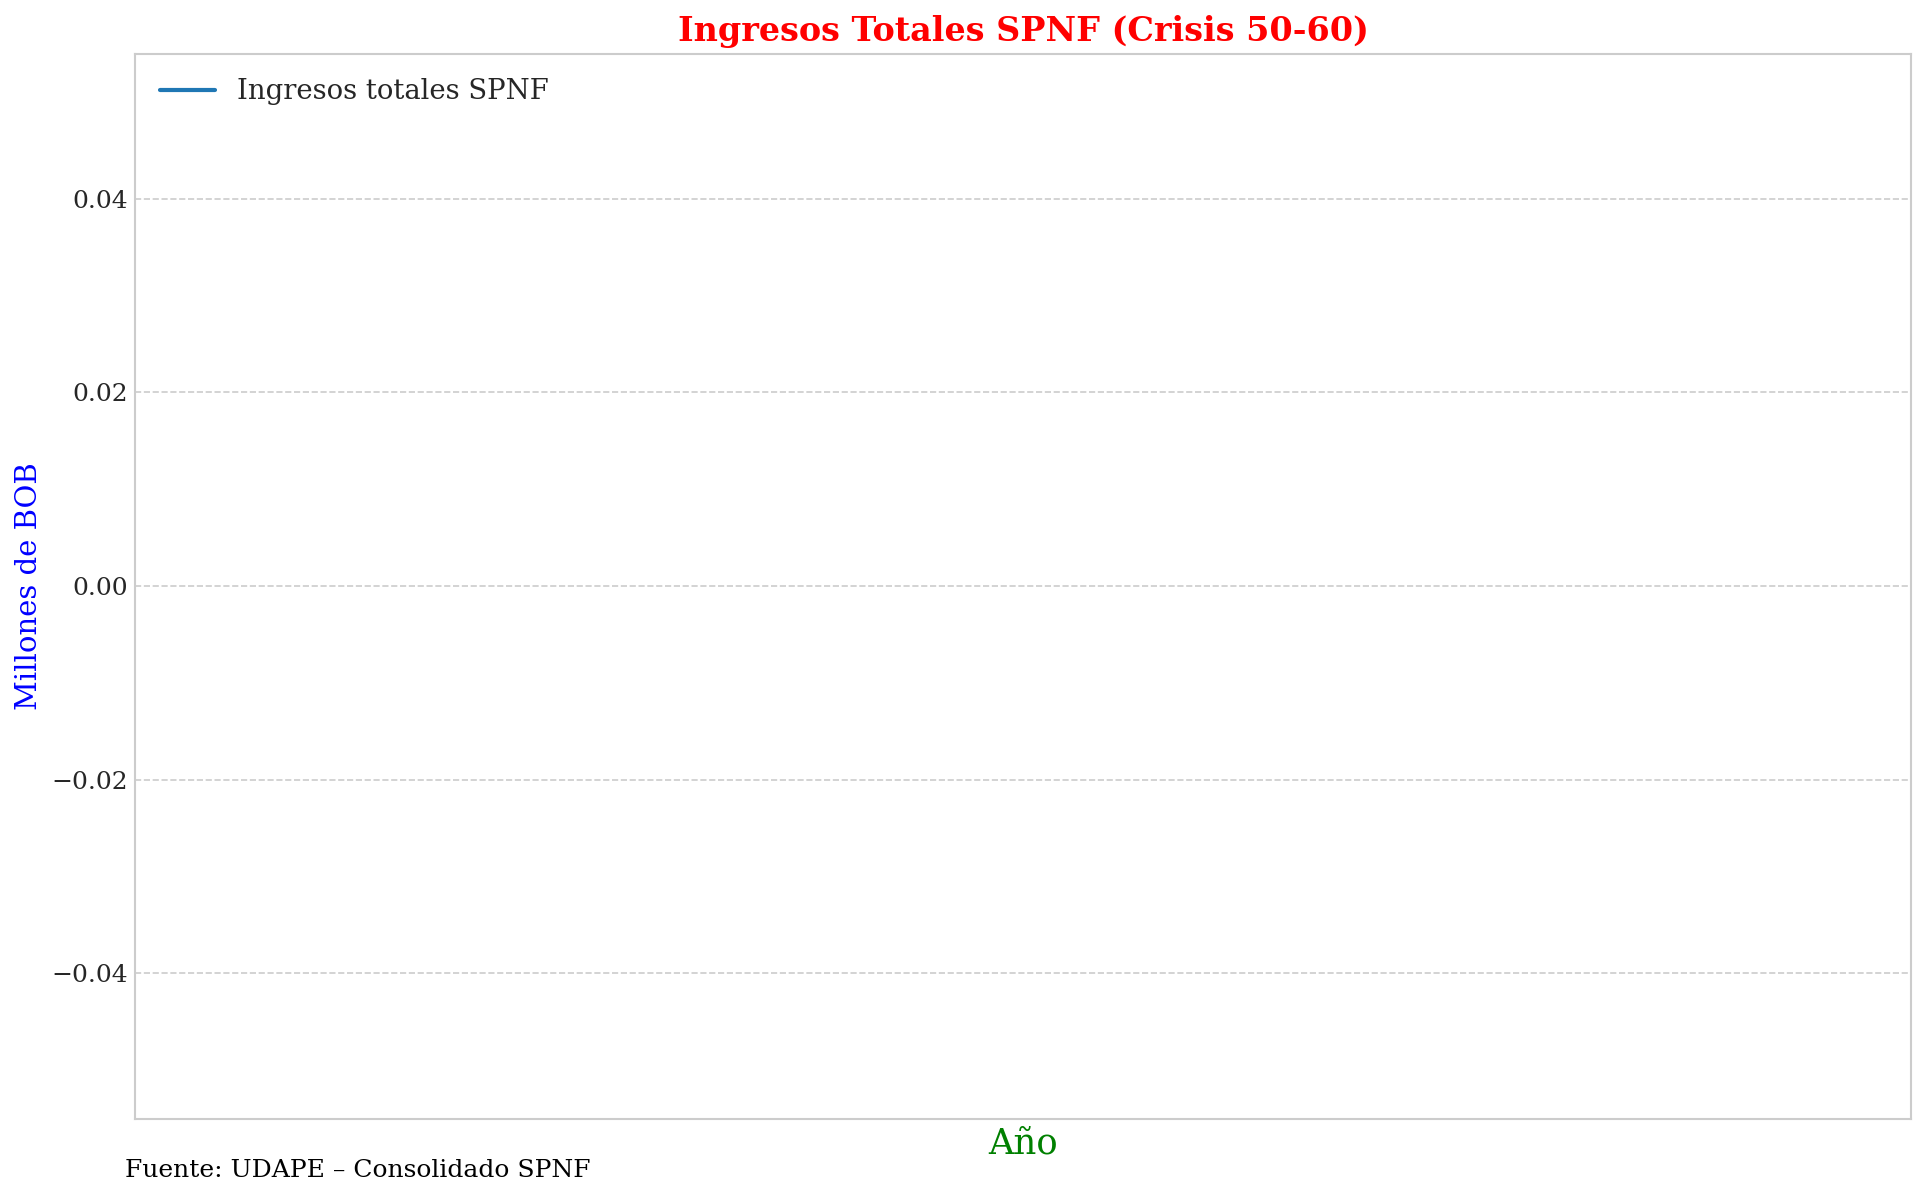

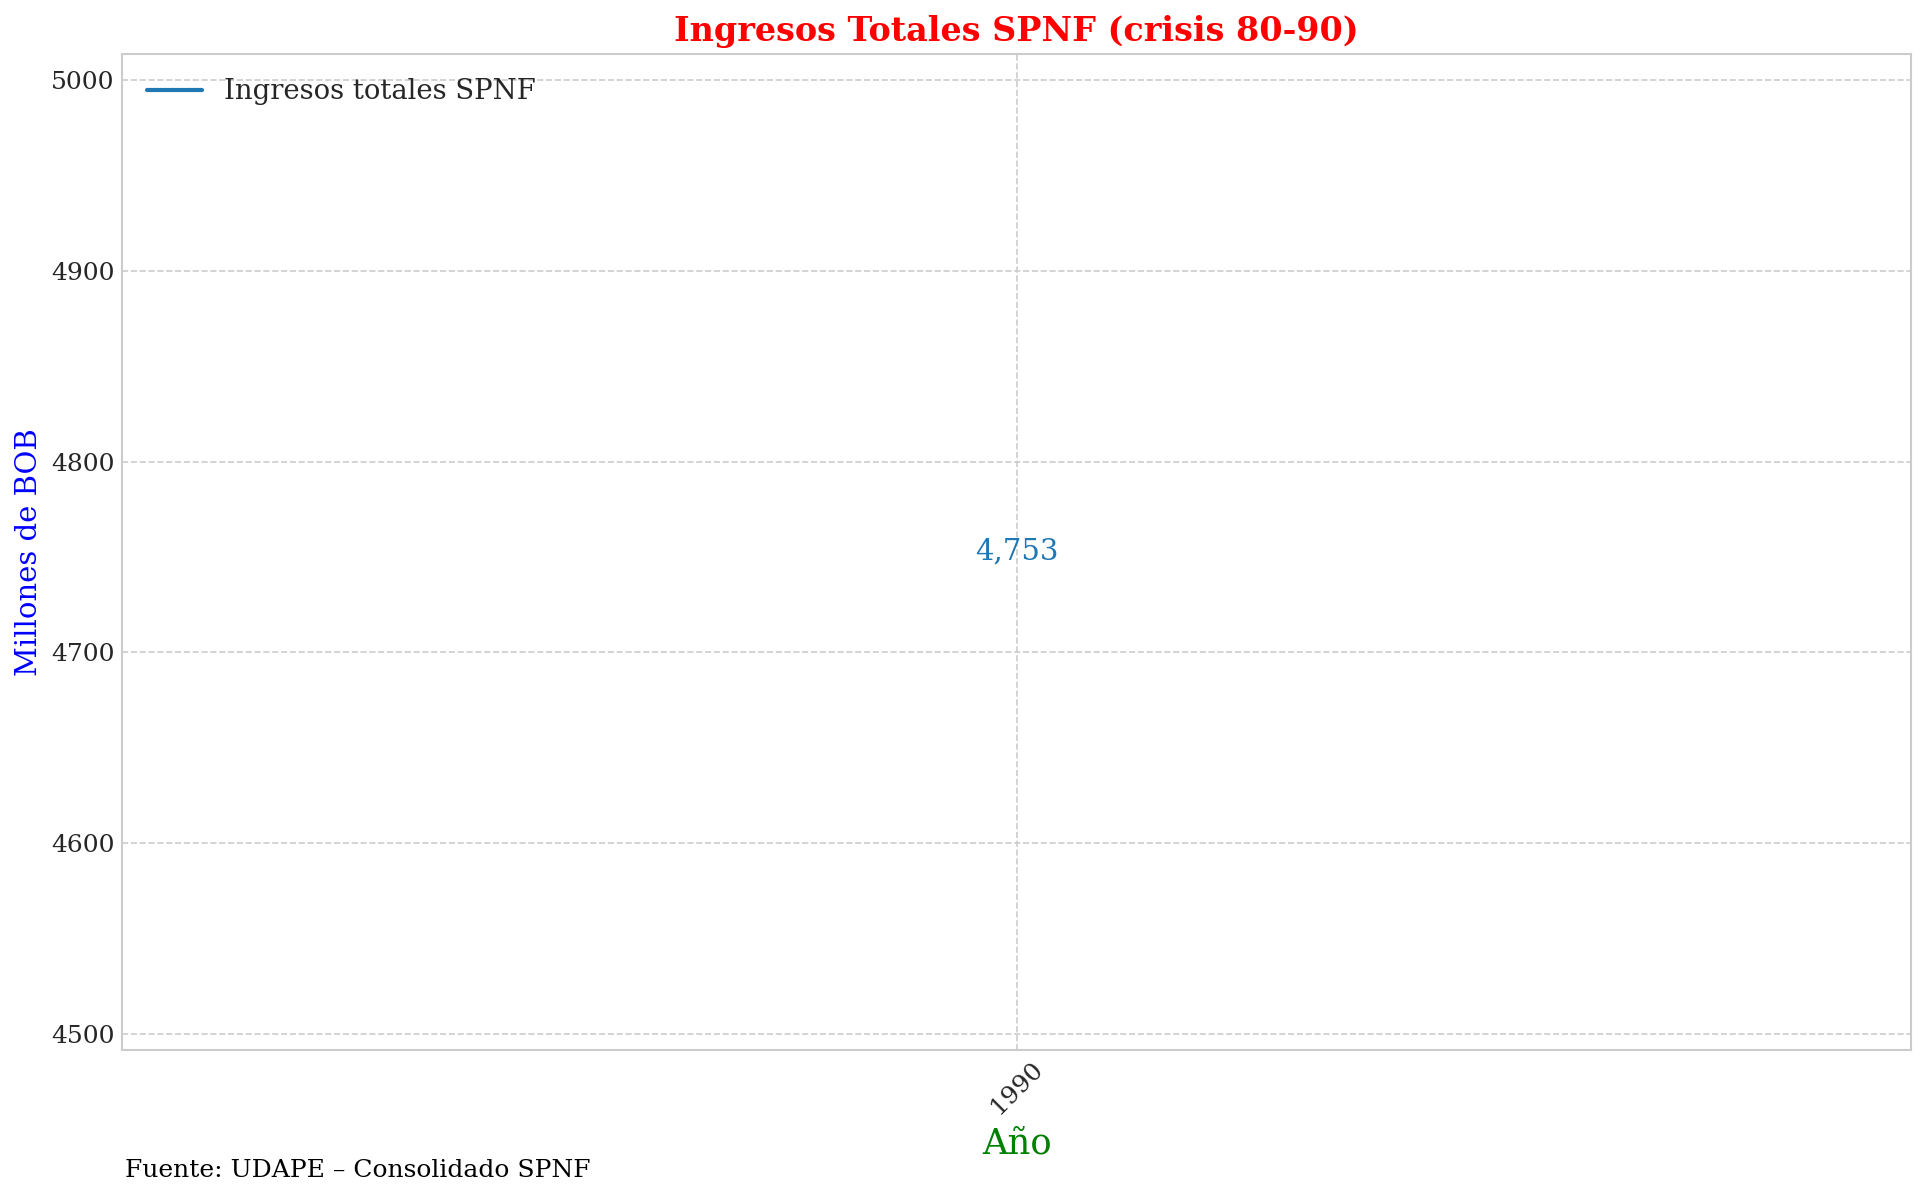

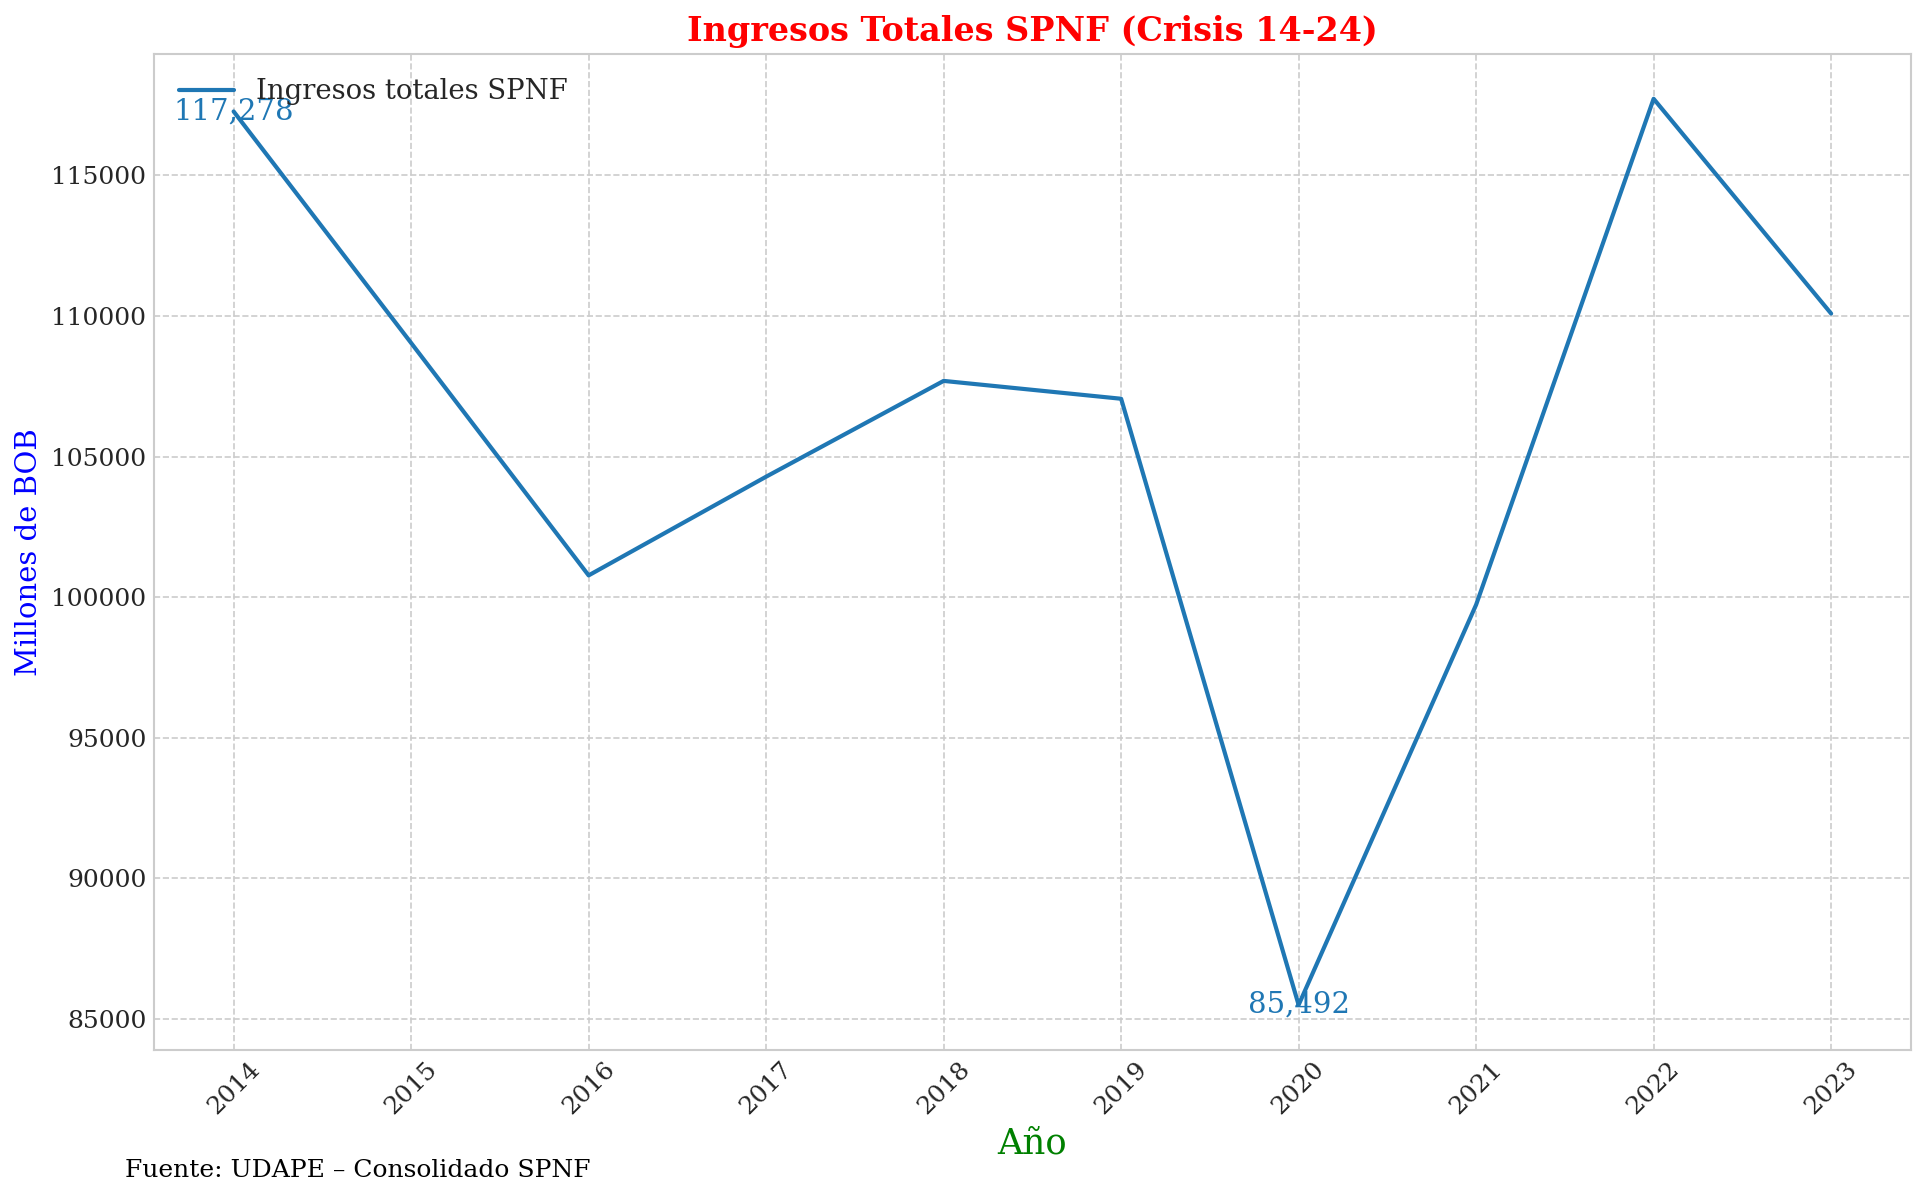

In [1]:
# ─────────────────────────────────────────────────────────────────────
# Importaciones
# ─────────────────────────────────────────────────────────────────────
import sys, os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

# Si aún no instalaste el paquete en editable, descomenta la siguiente línea:
# sys.path.append(os.path.abspath('../'))

from func_auxiliares.graficos_utils import (
    get_df, set_style, init_base_plot,
    add_year_value_annotations, compute_annot_years
)
from func_auxiliares.config import (
    DB_PATH, ASSETS_DIR,
    PERIODOS_PARA_CRISIS
)

# ─────────────────────────────────────────────────────────────────────
# Configuración general
# ─────────────────────────────────────────────────────────────────────
output_dir = ASSETS_DIR / "crisis" / "ingresos_gobierno"
output_dir.mkdir(parents=True, exist_ok=True)

set_style()

# ─────────────────────────────────────────────────────────────────────
# Carga de datos
# ─────────────────────────────────────────────────────────────────────
SQL = """
    SELECT
      año,
      ingresos_totales
    FROM consolidado_spnf
"""
df = get_df(SQL, str(DB_PATH), index_col="año")

# ─────────────────────────────────────────────────────────────────────
# Componentes y parámetros de graficado
# ─────────────────────────────────────────────────────────────────────
componentes      = [("ingresos_totales", "Ingresos totales SPNF")]
cols_componentes = [col for col, _ in componentes]
colors           = {"ingresos_totales": "#1f77b4"}

# Desplazamientos de anotaciones para “ingresos_totales”
annotation_offsets = {
    "ingresos_totales": {
        1950: (0, 0),
        1956: (0, 0),
        1960: (0, 0),
        1980: (0, 0),
        1986: (0, 0),
        1990: (0, 0),
        2014: (0, 0),
        2020: (0, 0),
        2023: (0, 0),
    }
}

# Años extra a anotar dentro de cada subperíodo
extra_annots = {
    "Crisis 50-60": [1956],
    "crisis 80-90": [1986],
    "Crisis 14-24": [2020],
}
# Para consolidado_spnf, solo habrá anotaciones reales en “Crisis 14-24”,
# pero mantenemos la estructura para posibles ampliaciones.

# ─────────────────────────────────────────────────────────────────────
# Generación de gráficas por subperíodo
# ─────────────────────────────────────────────────────────────────────
for nombre, (ini, fin) in PERIODOS_PARA_CRISIS.items():
    sub = df.loc[ini:fin]

    # Calcula años a anotar: siempre ini/fin + extras dentro del rango
    years_to_annot = compute_annot_years(ini, fin, extra_annots.get(nombre))

    fig, ax = init_base_plot(
        sub,
        series=componentes,
        colors=colors,
        title=f"Ingresos Totales SPNF ({nombre})",
        xlabel="Año",
        ylabel="Millones de BOB",
        source_text="Fuente: UDAPE – Consolidado SPNF"
    )

    add_year_value_annotations(
        ax,
        sub,
        years_to_annot,
        cols_componentes,
        annotation_offsets,
        colors,
        arrow_lw=0.5,
    )

    fig.savefig(output_dir / f"ingresos_gob_{nombre}.png")
    plt.show()
    plt.close(fig)